# Interpolation of data


In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Taylor expansion

\\( f(x)=\sum_{n=0}^\infty \frac{1}{n!}f^{(n)}(x_0)\,(x-x_0)^n\\)


Example: Exponential function

\\( f(x)=f'(x)=f''(x)=\dots=f^{(n)}(x)=\exp(x) \\)

In [3]:
def expTaylor(x, x0, nmax):
    # x: Argument
    # x0: Argument at which the derivatives will be calculated
    # nmax: n at which the series will terminate
    t = 0
    for n in range(nmax+1):
        t = t + np.exp(x0) * (x-x0)**n / np.math.factorial(n)
    return t

In [4]:
expTaylor(1, 0, 10)

2.7182818011463845

In [5]:
np.exp(1)

2.718281828459045

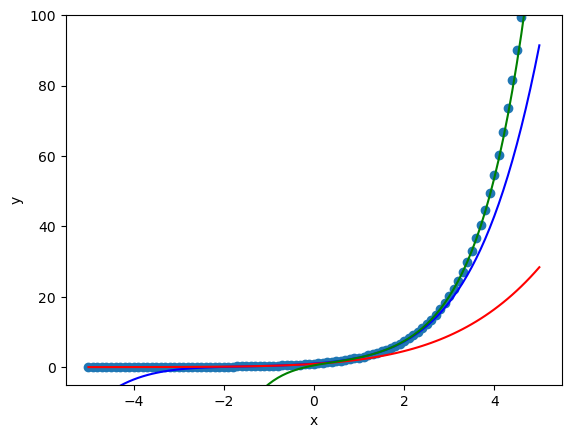

In [6]:
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-5,100])

x_list = np.linspace(-5,5,101)
plt.scatter(x_list, np.exp(x_list))

nmax = 5
plt.plot(x_list, expTaylor(x_list, 0, nmax), 'blue')
plt.plot(x_list, expTaylor(x_list, -3, nmax), 'red')
plt.plot(x_list, expTaylor(x_list, 2, nmax), 'green')

Example: sin function at \\(x_0 = 0\\)

\\( f(0) = f''(0) = f^{(4)}(0) = \dots = 0 \\)

\\( f'(0) = f^{(5)}(0) = f^{(9)}(0) = \dots = 1 \\)

\\( f'''(0) = f^{(7)}(0) = f^{(11)}(0) = \dots = -1 \\)

\\( \sin(x) = x - \frac{1}{3!}x^3 + \frac{1}{5!}x^5  - \frac{1}{7!}x^7 \pm \dots = \sum_{n=0}^\infty \frac{(-1)^n}{(2n+1)!}x^{2n+1}\\)

In [7]:
def sinTaylor(x, nmax):
    # x: Argument
    # nmax: n at which the series will terminate
    t = 0
    for n in range(nmax+1):
        t = t + (-1)**n * x**(2*n+1) / np.math.factorial(2*n+1)
    return t

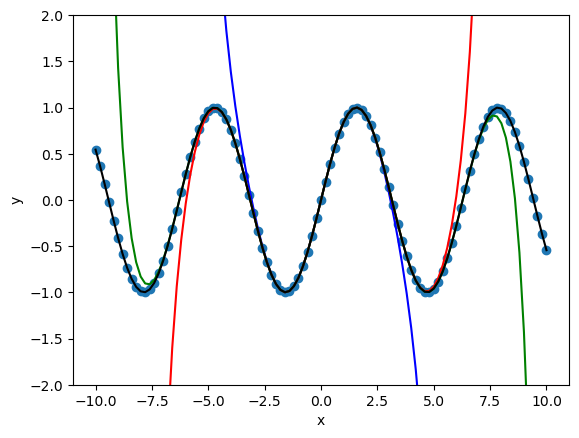

In [8]:
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-2,2])

x_list = np.linspace(-10,10,101)
plt.scatter(x_list, np.sin(x_list))

plt.plot(x_list, sinTaylor(x_list, 3), 'blue')
plt.plot(x_list, sinTaylor(x_list, 6), 'red')
plt.plot(x_list, sinTaylor(x_list, 9), 'green')
plt.plot(x_list, sinTaylor(x_list, 18), 'black')

- Accuracy of \\( \sin(10.5) \\)

In [9]:
np.sin(10.5) - sinTaylor(10.5, 50)

-2.844391389089651e-13

\\( f'(x) = \lim_{h\rightarrow 0} \frac{f(x+h)-f(x)}{h} \\)

In [10]:
def derivative(f, x, h):
    # f: Function
    # x: Argument of f
    # h: Stepsize
    return (f(x+h) - f(x)) / h

In [11]:
def func(x):
    return 2*np.sin(x)**2 + x

In [12]:
x0 = 10.5
h = 0.1

In [13]:
func(x0)

12.04772926022427

In [14]:
derivative(func, x0, h)

2.5529969724111723

\\( f^{(n)}(x) = \lim_{h\rightarrow 0} \frac{1}{h^n}\sum_{k=0}^n(-1)^{k+n} \,\frac{n!}{k!(n-k)!} \,f(x+kh)\\)

In [15]:
def nDerivative(f, x, h, n):
    # f: Function
    # x: Argument of f
    # h: Stepsize
    # n: nth derivative
    t = 0
    for k in range(n+1):
        t = t + (-1)**(k+n) * np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n-k)) * f(x + k*h)
    return t / h**n

In [16]:
nDerivative(func, x0, h, 0)

12.04772926022427

In [17]:
nDerivative(func, x0, h, 1)

2.5529969724111723

In [18]:
nDerivative(func, x0, h, 2)

-2.802754599797907

In [19]:
def taylor(f, x, x0, nmax, h):
    # f: Function
    # x: Argument
    # x0: Argument at which the derivatives will be calculated
    # nmax: n at which the series will terminate
    # h: Stepsize
    t = 0
    for n in range(nmax+1):
        t = t + nDerivative(f, x0, h, n) * (x-x0)**n / np.math.factorial(n)
    return t

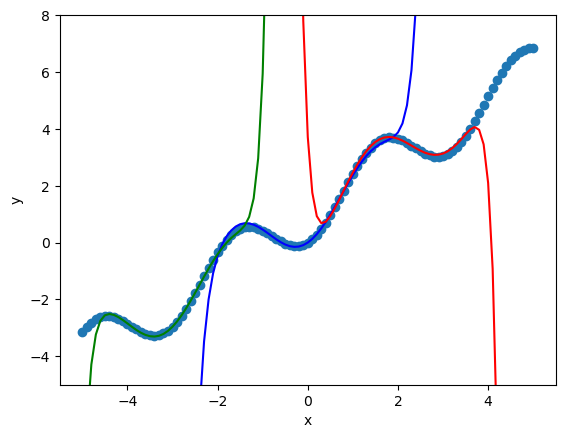

In [20]:
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-5,8])

x_list = np.linspace(-5,5,101)
plt.scatter(x_list, func(x_list))

nmax = 15
h = 0.05

plt.plot(x_list, taylor(func, x_list, 0, nmax, h), 'blue')
plt.plot(x_list, taylor(func, x_list, 2, nmax, h), 'red')
plt.plot(x_list, taylor(func, x_list, -3, nmax, h), 'green')

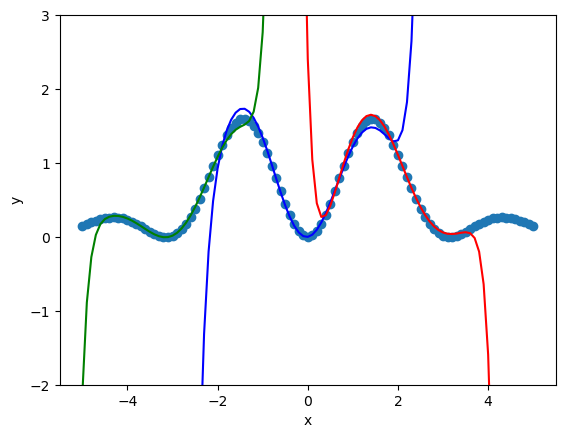

In [21]:
def func(x):
    return 2*np.sin(x)**2 * np.exp(-0.1*x**2)

plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-2,3])

x_list = np.linspace(-5,5,101)
plt.scatter(x_list, func(x_list))

nmax = 15
h = 0.05

plt.plot(x_list, taylor(func, x_list, 0, nmax, h), 'blue')
plt.plot(x_list, taylor(func, x_list, 2, nmax, h), 'red')
plt.plot(x_list, taylor(func, x_list, -3, nmax, h), 'green')

## 2. Interpolation

Generating data points

In [22]:
def correctFunction(x):
    return 15 + 2.4*x - 0.5*x**2 - 0.35*x**3

In [23]:
npoints = 21
x_list = np.linspace(-5,5,npoints)
data0 = np.array([x_list, correctFunction(x_list)])

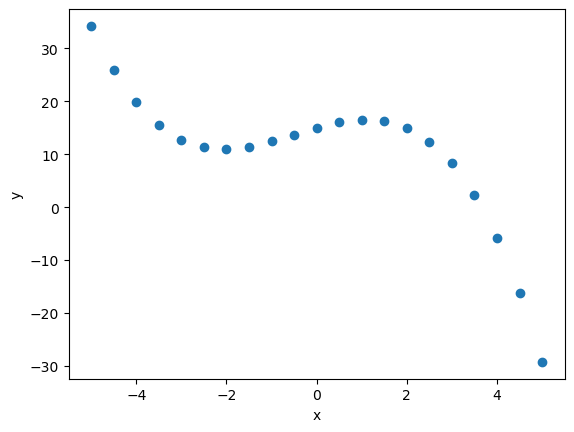

In [24]:
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data0[0], data0[1])

Modifying x and y values

In [25]:
0.1 * (2*np.random.rand(npoints)-1)

array([-0.00067895,  0.08620341,  0.08815749, -0.0055262 , -0.07393638,
        0.00476484,  0.09128348,  0.00115341, -0.06362699, -0.08101939,
       -0.09428663,  0.08092477, -0.0715718 ,  0.07437039, -0.04922149,
        0.09789856,  0.01363211, -0.03184721,  0.03333338, -0.07181282,
        0.08209824])

In [26]:
data = np.array([data0[0] + 0.25 * (2*np.random.rand(npoints)-1), data0[1] + 5.0 * (2*np.random.rand(npoints)-1)])

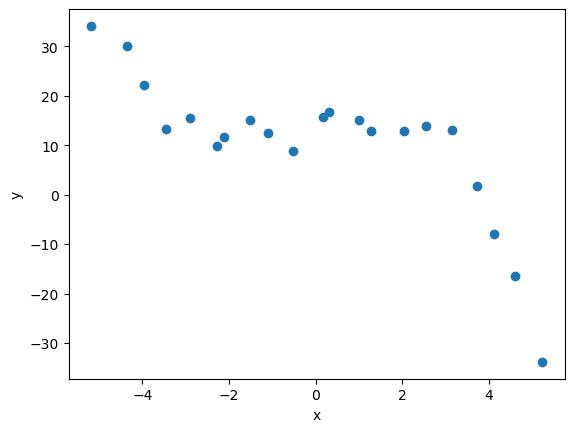

In [27]:
plt.xlabel('x')
plt.ylabel('y')

# plt.plot(data0[0], data0[1], 'black')
plt.scatter(data[0], data[1])

## Spline interpolation

Unperturbed data

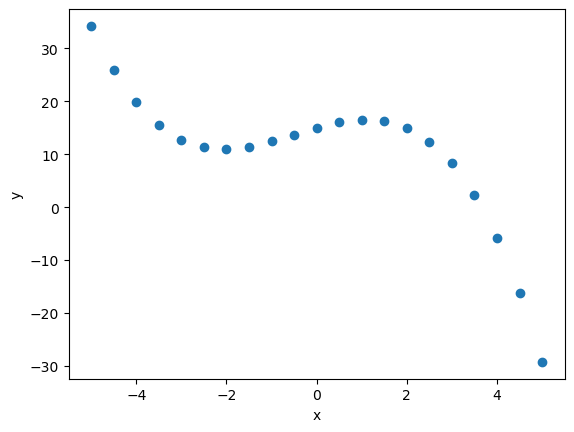

In [28]:
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data0[0], data0[1])

In [29]:
from scipy import interpolate

- linear splines

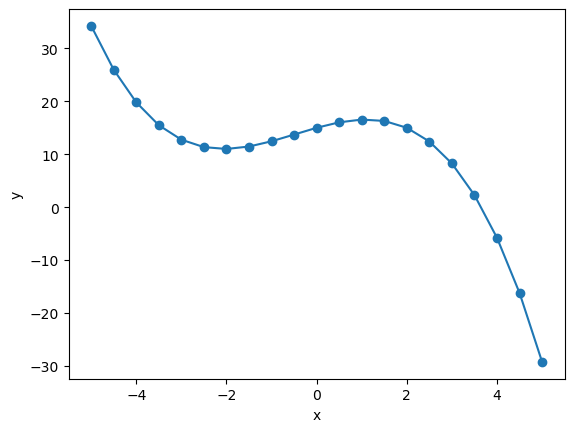

In [30]:
splineLinear0 = interpolate.interp1d(data0[0], data0[1], kind = 'linear')

plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data0[0], data0[1])
plt.plot(data0[0], splineLinear0(data0[0]))

- zoom

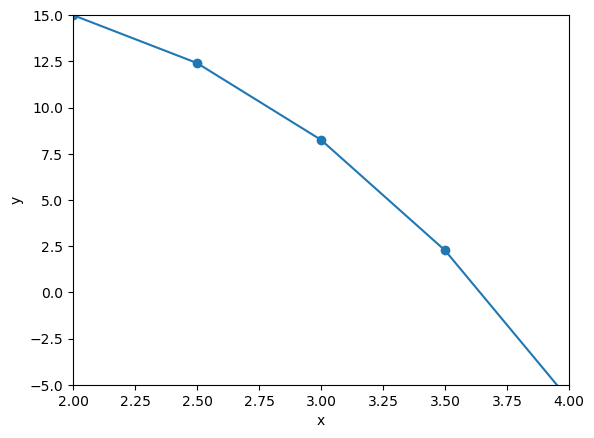

In [31]:
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([2,4])
plt.ylim([-5,15])
plt.scatter(data0[0], data0[1])

x_list = np.linspace(2,4,201)
plt.plot(x_list, splineLinear0(x_list))

- cubic spline

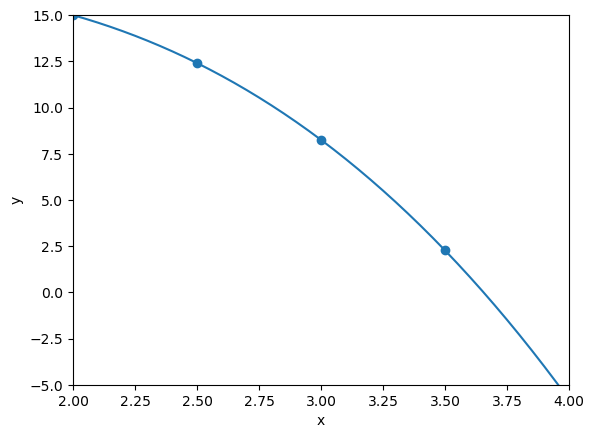

In [32]:
splineCubic0 = interpolate.interp1d(data0[0], data0[1], kind = 'cubic')

plt.xlabel('x')
plt.ylabel('y')
plt.xlim([2,4])
plt.ylim([-5,15])
plt.scatter(data0[0], data0[1])

x_list = np.linspace(2,4,201)
plt.plot(x_list, splineCubic0(x_list))

Perturbed data

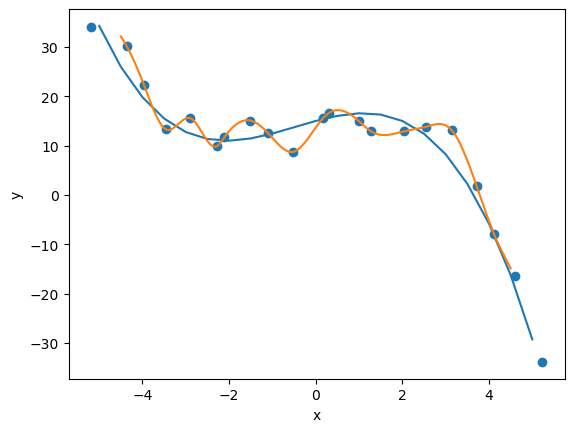

In [33]:
splineCubic = interpolate.interp1d(data[0], data[1], kind = 'cubic')

plt.xlabel('x')
plt.ylabel('y')

plt.plot(data0[0], data0[1])

x_list = np.linspace(-4.5,4.5,901)
plt.scatter(data[0], data[1])
plt.plot(x_list, splineCubic(x_list))

In [34]:
splineSmooth = interpolate.UnivariateSpline(data[0], data[1])
splineSmooth.set_smoothing_factor(500)

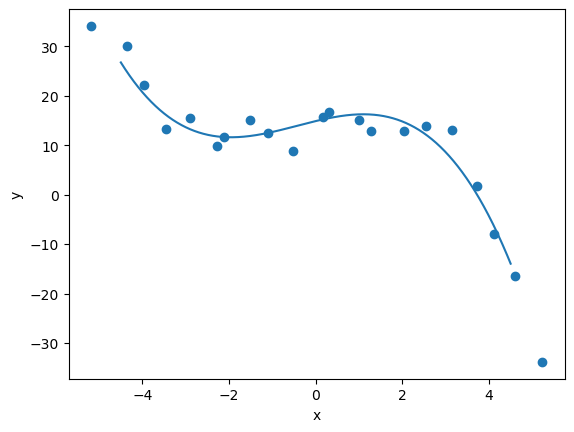

In [35]:
plt.xlabel('x')
plt.ylabel('y')

x_list = np.linspace(-4.5,4.5,901)
plt.scatter(data[0], data[1])
plt.plot(x_list, splineSmooth(x_list))

## Fitting a model function

\\( f(x) = a_0 + a_1 x + a_2 x^2 + \dots + a_n x^n = \sum_{k=0}^n a_k x^k\\)

In [36]:
def polynomialModel(x, a):
    t = 0
    for k in range(len(a)):
        t = t + a[k] * x**k
    return t

In [37]:
a0 = np.array([15, 2.4, -0.5, -0.35])
#a0 = np.array([1, 1, 1, 1])

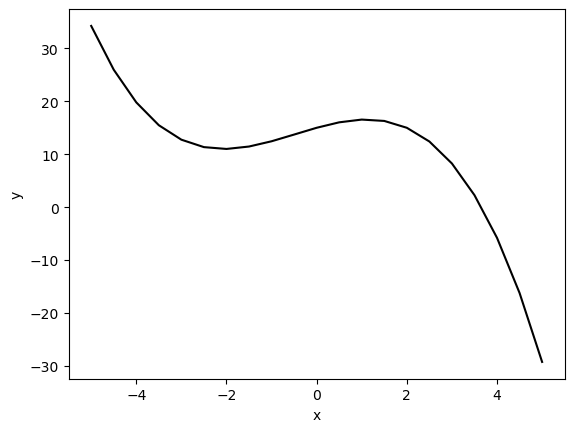

In [38]:
plt.xlabel('x')
plt.ylabel('y')

x_list = np.linspace(-5, 5, npoints)
plt.plot(x_list, polynomialModel(x_list, a0),'black')

\\( \Delta = \sum_{i=1}^n \left(y_i-f(x_i)\right)^2\\)

In [39]:
def errorFit(f, coefficients, data):
    # f: The fit function
    # coefficients: ai that we try to optimize
    # data: The data we try to fit
    error = 0
    for i in range(len(data[0])):
        error = error + ( data[1,i] - f( data[0,i], coefficients ))**2
        # print(error)
    return error

In [40]:
errorFit(polynomialModel, a0, data)

191.4543587970832

\\( \frac{\partial}{\partial a_k} \Delta = -2 \sum_{i=1}^n \left(y_i-f(x_i)\right) \frac{\partial}{\partial a_k}f(x_i) = -2 \sum_{i=1}^n \left(y_i-f(x_i)\right) x_i^{k}\\)

In [41]:
def errorFitGradient(f, coefficients, data):
    # f: The fit function
    # coefficients: ai that we try to optimize
    # data: The data we try to fit
    return -2 * np.array([
            np.sum(np.array([(data[1,i] - f(data[0,i], coefficients)) * data[0,i]**k for i in range(len(data[0]))]))
        for k in range(len(coefficients))])

In [42]:
errorFitGradient(polynomialModel, a0, data)

array([  -28.06889788,   -46.63785874,  -531.03960848, -1411.47602782])

In [43]:
iterations = 100000
h = 0.00001
a = 2*np.random.rand(4)-1

for i in range(iterations):
    a = a - h * errorFitGradient(polynomialModel, a, data)

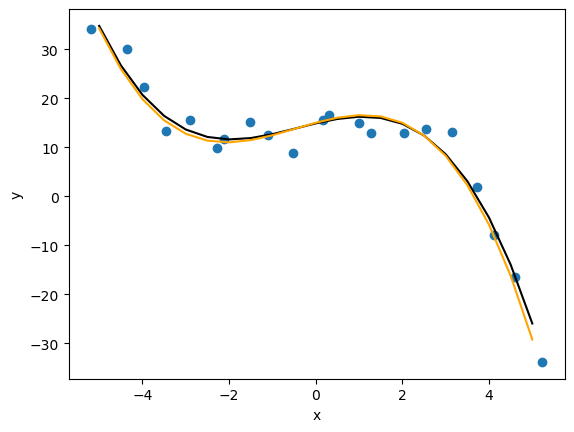

In [44]:
plt.xlabel('x')
plt.ylabel('y')

x_list = np.linspace(-5, 5, npoints)
plt.plot(x_list, polynomialModel(x_list, a),'black')
plt.plot(x_list, polynomialModel(x_list, a0),'orange')
plt.scatter(data[0], data[1])

In [45]:
print(errorFit(polynomialModel, a, data))
print(errorFit(polynomialModel, a0, data))

162.54960466381425
191.4543587970832


In [46]:
print(a)
print(a0)

[14.86922287  2.10516884 -0.41900867 -0.32717214]
[15.    2.4  -0.5  -0.35]
